# Extracting Text Blocks

Often, you need a specific section, like a paragraph between two headings. You can find a starting element and select everything below it until an ending element.

Let's extract the "Summary" section from `01-practice.pdf`. It starts after "Summary:" and ends before the thick horizontal line.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load the PDF and get the page
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Find the starting element ("Summary:")
start_marker = page.find('text:contains("Summary:")')

# Select elements below the start_marker, stopping *before*
# the thick horizontal line (a line with height > 1).
summary_elements = start_marker.below(
    include_source=True, # Include the "Summary:" text itself
    until="line[height > 1]"
)

# Visualize the elements found in this block
summary_elements.highlight(color="lightgreen", label="Summary Block")

# Extract and display the text from the collection of summary elements
summary_elements.extract_text()


'Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary\nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in\nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\ninto the vats; and when they were fished out, there was never enough of them left to be worth\nexhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out\nto the world as Durham’s Pure Leaf Lard!\nViolations\nStatute Description Level Repeat?\n4.12.7 Unsanitary Working Conditions. Critical\n5.8.3 Inadequate Protective Equipment. Serious\n6.3.9 Ineffective Injury Prevention. Serious\n7.1.5 Failure to Properly Store Hazardous Materials. Critical\n8.9.2 Lack of Adequate Fire Safety Measures. Serious\n9.6.4 Inadequate Ventilation System

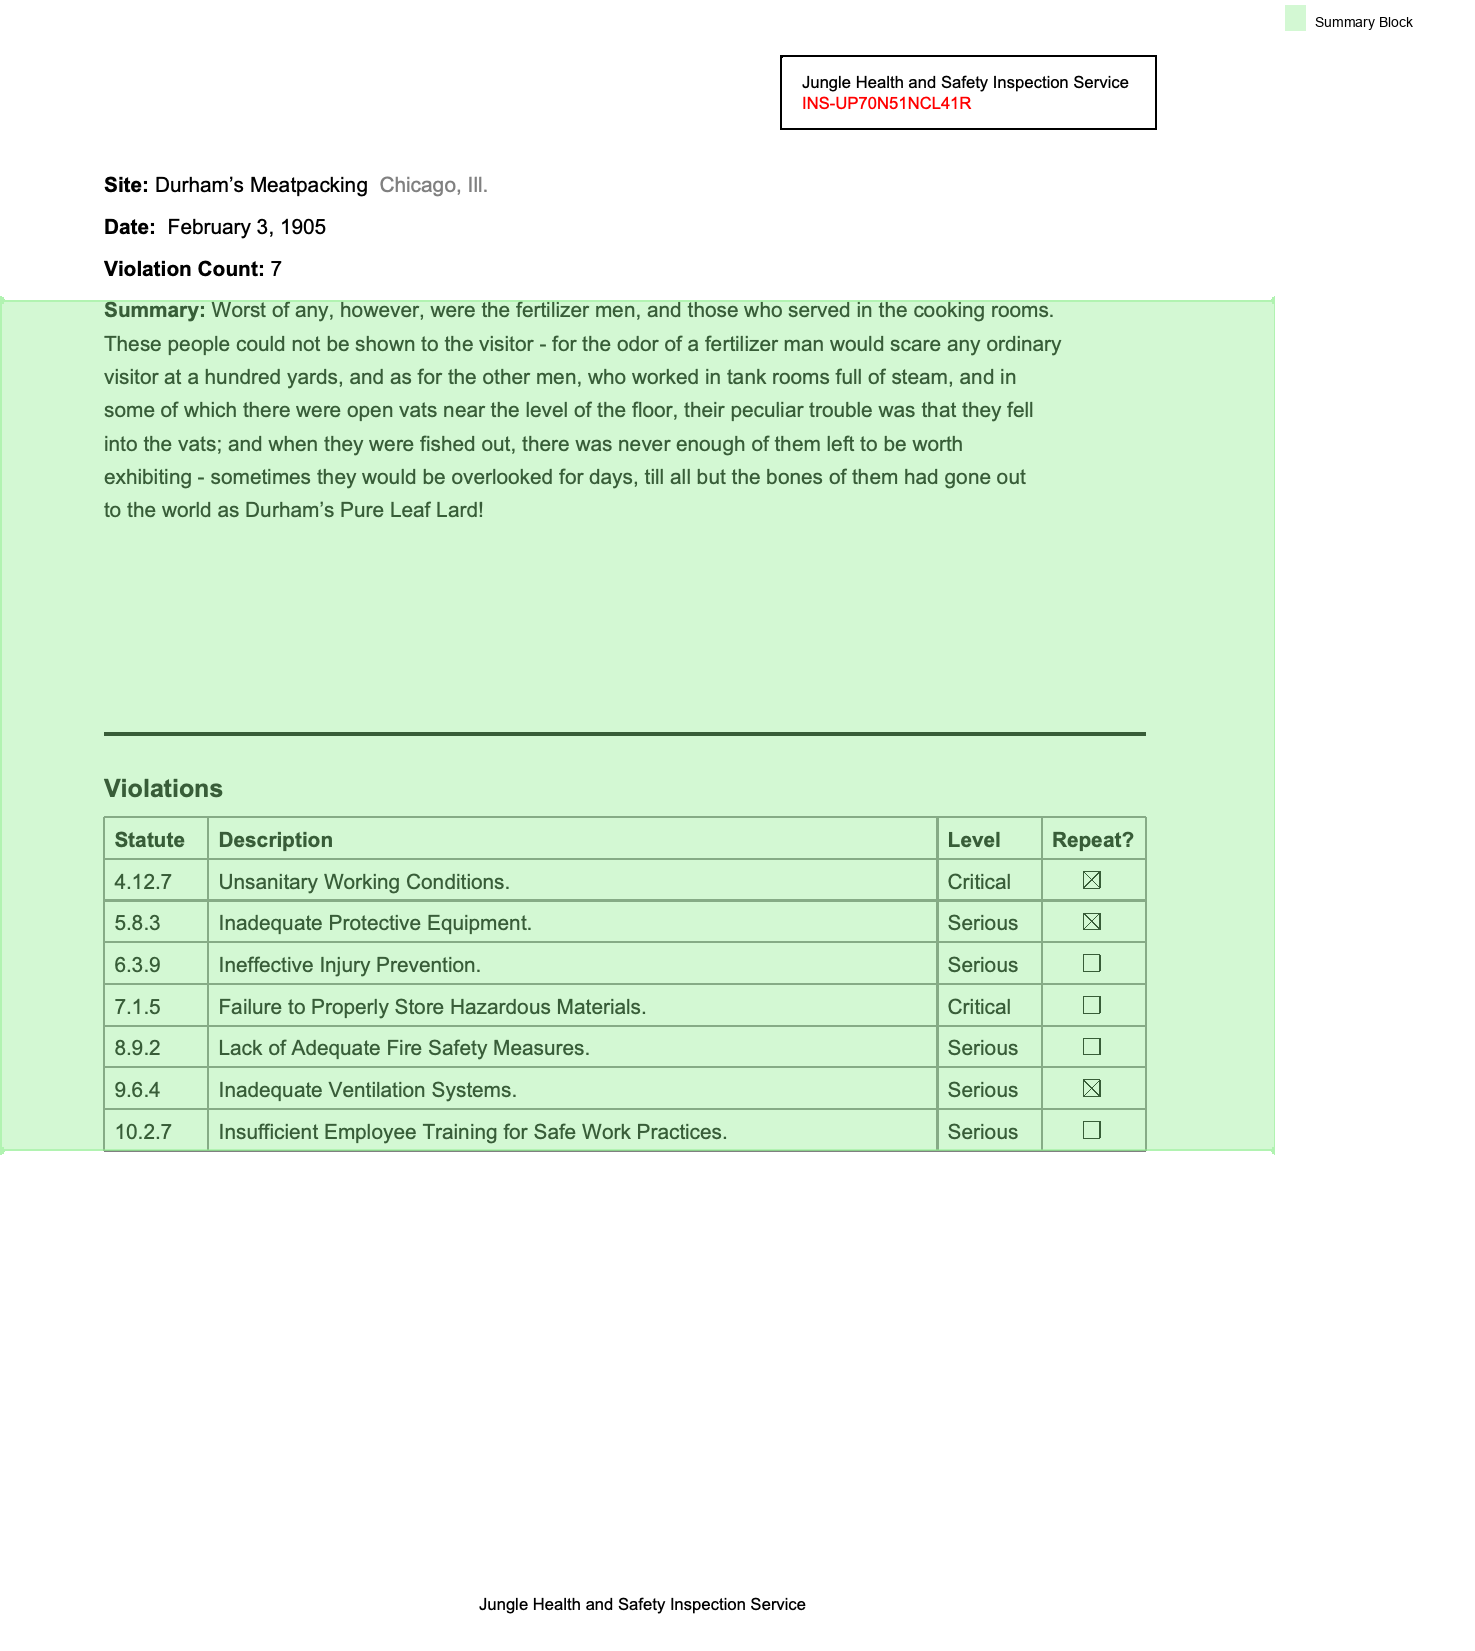

In [3]:
# Display the page image to see the visualization
page.to_image()

This selects the elements using `.below(until=...)` and extracts their text. The second code block displays the page image with the visualized section.

<div class="admonition note">
<p class="admonition-title">Selector Specificity</p>

    We used `line[height > 1]` to find the thick horizontal line. You might need to adjust selectors based on the specific PDF structure. Inspecting element properties can help you find reliable start and end markers.
</div>